In [10]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [3]:
# Function to generate a grid map with obstacles
def generate_grid(grid_size=6, cell_size=0.1, obstacles=[]):
    num_cells = int(grid_size / cell_size)  # 60x60 grid
    grid = np.zeros((num_cells, num_cells), dtype=int)  # Initialize all free space
    
    # Iterate through each cell to check for obstacles
    for i in range(num_cells):
        for j in range(num_cells):
            # Convert grid index to real-world coordinates
            x = i * cell_size + (cell_size / 2)  # Cell center x
            y = j * cell_size + (cell_size / 2)  # Cell center y

            # Check if cell falls within any obstacle
            for obs_x, obs_y, radius in obstacles:
                distance = np.sqrt((x - obs_x) ** 2 + (y - obs_y) ** 2)
                if distance <= radius:
                    grid[i, j] = 1  # Mark as obstacle
    
    return grid


In [43]:
import heapq

class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start node
        self.h = 0  # Heuristic cost to goal
        self.f = 0  # Total cost

    def __lt__(self, other):
        return self.f < other.f  # Priority queue sorting

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan distance

def astar(grid, start, goal):
    open_list = []
    closed_set = set()
    start_node = Node(start)
    goal_node = Node(goal)
    
    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.position == goal_node.position:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]  # Return reversed path
        
        closed_set.add(current_node.position)

        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # 4-way movement
            neighbor_pos = (current_node.position[0] + dx, current_node.position[1] + dy)
            
            if 0 <= neighbor_pos[0] < len(grid) and 0 <= neighbor_pos[1] < len(grid[0]) and grid[neighbor_pos[0]][neighbor_pos[1]] == 0:
                if neighbor_pos in closed_set:
                    continue

                neighbor = Node(neighbor_pos, current_node)
                neighbor.g = current_node.g + 1
                neighbor.h = heuristic(neighbor_pos, goal_node.position)
                neighbor.f = neighbor.g + neighbor.h

                if not any(n.position == neighbor.position and n.f <= neighbor.f for n in open_list):
                    heapq.heappush(open_list, neighbor)

    return None

In [75]:
# Define obstacles (x, y, radius)
obstacles = [
    (1.5, 2.5, 0.5),
    (2.0, 3.5, 0.25),
    (2.5, 4.0, 0.5),
]
cell_size = 0.2

# Generate the 6x6 grid with 0.1 cell size
grid = generate_grid(grid_size=6, cell_size=cell_size, obstacles=obstacles)
start =(round(1/cell_size), round(2/cell_size))
goal = (round(3/cell_size), round(5/cell_size))

path = astar(grid, start, goal)
print(path)
path_x = [x for x, _ in path]
path_y = [y for _, y in path]

[(5, 10), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 14), (5, 15), (6, 15), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (7, 21), (8, 21), (9, 21), (9, 22), (10, 22), (11, 22), (11, 23), (11, 24), (11, 25), (12, 25), (13, 25), (14, 25), (15, 25)]


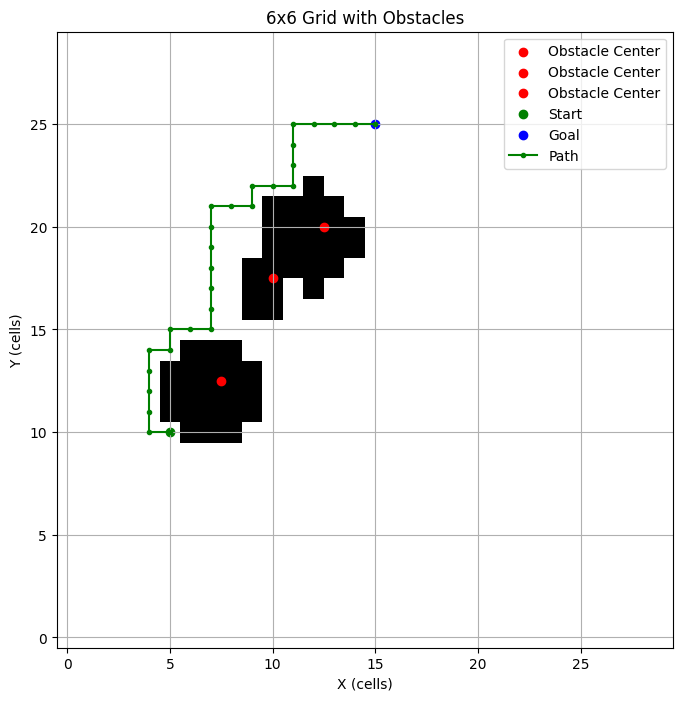

In [76]:
# Plot the grid
plt.figure(figsize=(8, 8))
plt.imshow(grid.T, origin="lower", cmap="gray_r")  # Transposed for correct orientation
plt.xlabel("X (cells)")
plt.ylabel("Y (cells)")
plt.title("6x6 Grid with Obstacles")

# Mark obstacle centers
for obs_x, obs_y, radius in obstacles:
    plt.scatter(obs_x / cell_size, obs_y / cell_size, color='red', marker='o', label="Obstacle Center")
plt.scatter(1/cell_size, 2/cell_size, color='green', marker='o', label="Start")
plt.scatter(3/cell_size, 5/cell_size, color='blue', marker='o', label="Goal")
plt.plot(path_x, path_y, marker="o", color="green", markersize=3, label="Path")

plt.legend()
plt.grid()
plt.show()

# CONVEX HULLS

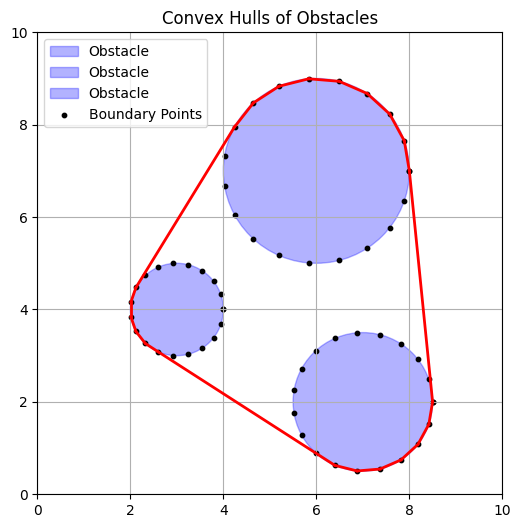

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Define grid size
grid_size = (10, 10)  # 10x10 grid

# Define obstacles with (center_x, center_y, radius)
obstacles = [
    (3, 4, 1),
    (7, 2, 1.5),
    (6, 7, 2),
]

# Generate obstacle boundary points
obstacle_points = []
num_points_per_obstacle = 20  # More points = smoother approximation

for (cx, cy, r) in obstacles:
    angles = np.linspace(0, 2 * np.pi, num_points_per_obstacle)
    x_points = cx + r * np.cos(angles)
    y_points = cy + r * np.sin(angles)
    obstacle_points.append(np.column_stack((x_points, y_points)))

# Flatten the obstacle points
all_points = np.vstack(obstacle_points)

# Compute convex hull
hull = ConvexHull(all_points)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, grid_size[0])
ax.set_ylim(0, grid_size[1])

# Plot obstacles
for (cx, cy, r) in obstacles:
    circle = plt.Circle((cx, cy), r, color="blue", alpha=0.3, label="Obstacle")
    ax.add_patch(circle)

# Plot convex hull
for simplex in hull.simplices:
    plt.plot(all_points[simplex, 0], all_points[simplex, 1], 'r-', linewidth=2, label="Convex Hull" if simplex[0] == 0 else "")

# Plot points
plt.scatter(all_points[:, 0], all_points[:, 1], color="black", s=10, label="Boundary Points")

plt.title("Convex Hulls of Obstacles")
plt.legend()
plt.grid(True)
plt.show()


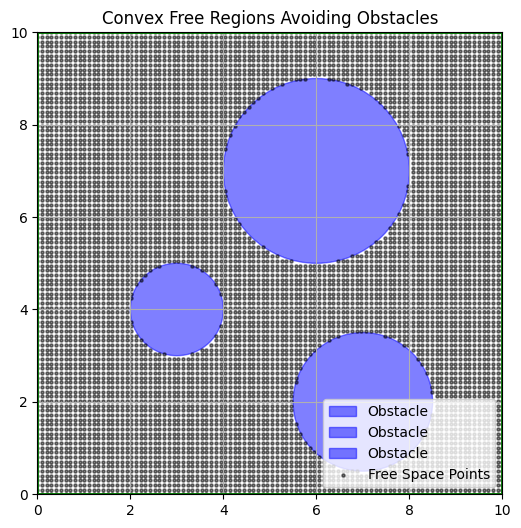

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Define grid size
grid_size = (10, 10)

# Define obstacles with (center_x, center_y, radius)
obstacles = [
    (3, 4, 1),
    (7, 2, 1.5),
    (6, 7, 2),
]

# Generate a dense set of points in the grid
x_vals = np.linspace(0, grid_size[0], 100)
y_vals = np.linspace(0, grid_size[1], 100)
grid_points = np.array(np.meshgrid(x_vals, y_vals)).T.reshape(-1, 2)

# Remove points inside obstacles
def is_inside_obstacle(point, obstacles):
    px, py = point
    for (cx, cy, r) in obstacles:
        if np.sqrt((px - cx)**2 + (py - cy)**2) <= r:
            return True
    return False

free_space_points = np.array([p for p in grid_points if not is_inside_obstacle(p, obstacles)])

# Compute convex hull of free space points
hull = ConvexHull(free_space_points)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, grid_size[0])
ax.set_ylim(0, grid_size[1])

# Plot obstacles
for (cx, cy, r) in obstacles:
    circle = plt.Circle((cx, cy), r, color="blue", alpha=0.5, label="Obstacle")
    ax.add_patch(circle)

# Plot convex free-space region
for simplex in hull.simplices:
    plt.plot(free_space_points[simplex, 0], free_space_points[simplex, 1], 'g-', linewidth=2, label="Free Space Convex Hull" if simplex[0] == 0 else "")

# Plot free space points
plt.scatter(free_space_points[:, 0], free_space_points[:, 1], color="black", s=5, alpha=0.5, label="Free Space Points")

plt.title("Convex Free Regions Avoiding Obstacles")
plt.legend()
plt.grid(True)
plt.show()


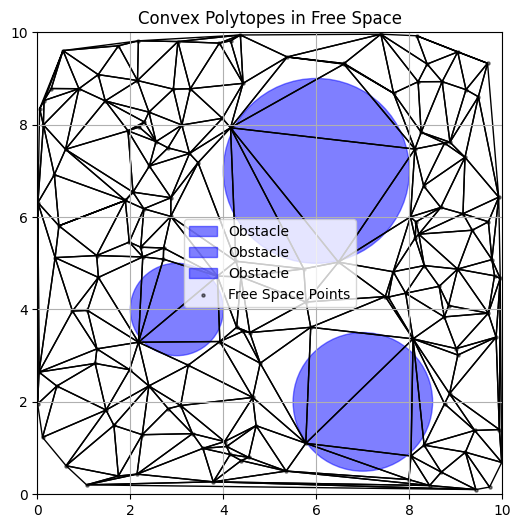

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Define grid size
grid_size = (10, 10)

# Define obstacles (center_x, center_y, radius)
obstacles = [
    (3, 4, 1),
    (7, 2, 1.5),
    (6, 7, 2),
]

# Generate a set of random points in the free space
num_points = 200  # Adjust density
points = np.random.rand(num_points, 2) * np.array(grid_size)  # Scale to grid

# Remove points inside obstacles
def is_inside_obstacle(point, obstacles):
    px, py = point
    for (cx, cy, r) in obstacles:
        if np.sqrt((px - cx)**2 + (py - cy)**2) <= r:
            return True
    return False

free_space_points = np.array([p for p in points if not is_inside_obstacle(p, obstacles)])

# Compute Delaunay triangulation to form polytopes
tri = Delaunay(free_space_points)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, grid_size[0])
ax.set_ylim(0, grid_size[1])

# Plot obstacles
for (cx, cy, r) in obstacles:
    circle = plt.Circle((cx, cy), r, color="blue", alpha=0.5, label="Obstacle")
    ax.add_patch(circle)

# Plot polytopes (triangles from Delaunay)
for simplex in tri.simplices:
    polygon = free_space_points[simplex]
    plt.fill(polygon[:, 0], polygon[:, 1], edgecolor='black', fill=False, linewidth=1)

# Plot free space points
plt.scatter(free_space_points[:, 0], free_space_points[:, 1], color="black", s=5, alpha=0.5, label="Free Space Points")

plt.title("Convex Polytopes in Free Space")
plt.legend()
plt.grid(True)
plt.show()


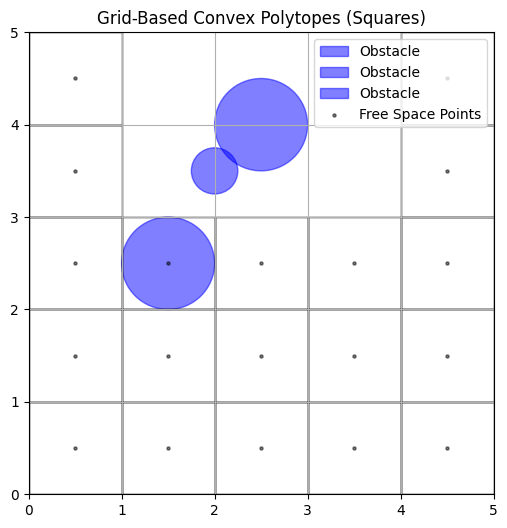

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size
grid_size = (5, 5)
cell_size = 1  # Each square's size

# Define obstacles (center_x, center_y, radius)
obstacles = [
    (1.5, 2.5, 0.5),
    (2.0, 3.5, 0.25),
    (2.5, 4.0, 0.5),
]

# Generate grid points
x_vals = np.arange(0, grid_size[0], cell_size)
y_vals = np.arange(0, grid_size[1], cell_size)
grid_points = np.array(np.meshgrid(x_vals, y_vals)).T.reshape(-1, 2)

# Function to check if a square is occupied by an obstacle
def is_inside_obstacle(x, y, obstacles, cell_size):
    for (cx, cy, r) in obstacles:
        # Check if any corner of the square is inside the obstacle
        corners = [(x, y), (x+cell_size, y), (x, y+cell_size), (x+cell_size, y+cell_size)]
        if any(np.sqrt((px - cx)**2 + (py - cy)**2) <= r for px, py in corners):
            return True
    return False

# Identify free-space cells
free_cells = []
for x, y in grid_points:
    if not is_inside_obstacle(x, y, obstacles, cell_size):
        free_cells.append((x, y))

# Convert to NumPy array
free_cells = np.array(free_cells)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, grid_size[0])
ax.set_ylim(0, grid_size[1])

# Plot obstacles
for (cx, cy, r) in obstacles:
    circle = plt.Circle((cx, cy), r, color="blue", alpha=0.5, label="Obstacle")
    ax.add_patch(circle)

# Plot grid squares (convex sets)
for x, y in free_cells:
    rect = plt.Rectangle((x, y), cell_size, cell_size, edgecolor='black', facecolor='none', linewidth=1)
    ax.add_patch(rect)

# Plot free space points (for reference)
plt.scatter(free_cells[:, 0] + cell_size/2, free_cells[:, 1] + cell_size/2, color="black", s=5, alpha=0.5, label="Free Space Points")

plt.title("Grid-Based Convex Polytopes (Squares)")
plt.legend()
plt.grid(True)
plt.show()


# LEARNING

In [ ]:
initial_pos = np.array([1.0, 2.0])
goal_pos = np.array([3.0, 5.0])
u_limits = 0.2 * np.array([[-1.0, 1.0], [-1.0, 1.0]])
dt = 1.0

obstacles = [
    (1.5, 2.5, 0.5),
    (2.0, 3.5, 0.25),
    (2.5, 4.0, 0.5),
]

Optimized Waypoints:
[[1.88703846 3.14241827]
 [1.88703847 3.14241826]
 [1.78171156 3.19508172]
 [2.30037448 3.27406377]
 [2.30310706 3.27630491]]


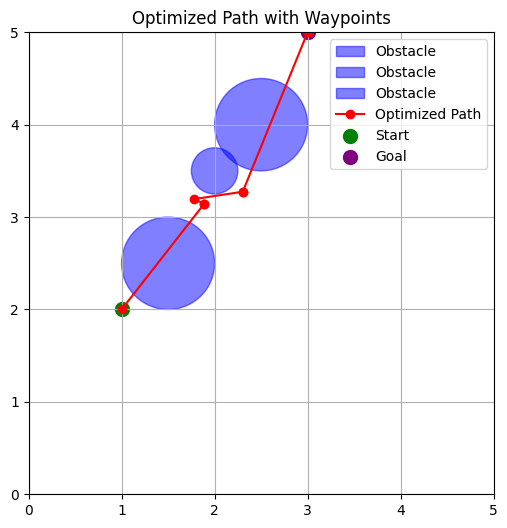

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def waypoint_optimization(num_points, initial_pos, goal_pos, obstacles):
    """
    Optimize waypoints to minimize total travel distance while avoiding obstacles.

    :param num_points: Number of waypoints to generate.
    :param initial_pos: Start position as (x, y).
    :param goal_pos: Goal position as (x, y).
    :param obstacles: List of obstacles [(x_center, y_center, radius), ...].
    :return: Optimized waypoints.
    """
    
    # Initial guess: Linearly interpolate points between start and goal
    init_guess = np.linspace(initial_pos, goal_pos, num_points + 2)[1:-1].flatten()

    # Objective Function: Minimize total path distance across all waypoints
    def objective(waypoints):
        waypoints = waypoints.reshape((num_points, 2))
        total_dist = 0
        total_dist += np.linalg.norm(initial_pos - waypoints[0])  # Start to first waypoint
        for i in range(num_points - 1):
            total_dist += np.linalg.norm(waypoints[i] - waypoints[i + 1])  # Between waypoints
        total_dist += np.linalg.norm(waypoints[-1] - goal_pos)  # Last waypoint to goal
        return total_dist

    # Constraint: Waypoints must be outside obstacle radii
    def obstacle_constraint(waypoints):
        waypoints = waypoints.reshape((num_points, 2))
        constraints = []
        for x, y in waypoints:
            for cx, cy, r in obstacles:
                constraints.append(np.sqrt((x - cx) ** 2 + (y - cy) ** 2) - 1.5*r)  # Must be greater than radius
        return np.array(constraints)

    # Bounds: Ensure waypoints remain within reasonable space
    bounds = [(0, 5)] * (2 * num_points)  # Assuming workspace limits

    # Solve optimization problem
    result = minimize(
        objective,
        init_guess,
        constraints={'type': 'ineq', 'fun': obstacle_constraint},
        bounds=bounds,
        method='SLSQP'  # Sequential Least Squares Quadratic Programming
    )

    if result.success:
        return result.x.reshape((num_points, 2))
    else:
        print("Optimization failed:", result.message)
        return None

# Define parameters
initial_pos = np.array([1.0, 2.0])
goal_pos = np.array([3.0, 5.0])
obstacles = [(1.5, 2.5, 0.5), (2.0, 3.5, 0.25), (2.5, 4.0, 0.5)]
num_points = 5  # Number of waypoints

# Get optimized waypoints
optimized_waypoints = waypoint_optimization(num_points, initial_pos, goal_pos, obstacles)

# Plot the results
def plot_waypoints(initial_pos, goal_pos, obstacles, waypoints):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)

    # Plot obstacles
    for (cx, cy, r) in obstacles:
        circle = plt.Circle((cx, cy), r, color="blue", alpha=0.5, label="Obstacle")
        ax.add_patch(circle)

    # Plot waypoints and path
    if waypoints is not None:
        path = np.vstack([initial_pos, waypoints, goal_pos])
        plt.plot(path[:, 0], path[:, 1], 'r-o', label="Optimized Path")
    
    plt.scatter(*initial_pos, color="green", s=100, label="Start")
    plt.scatter(*goal_pos, color="purple", s=100, label="Goal")

    plt.title("Optimized Path with Waypoints")
    plt.legend()
    plt.grid(True)
    plt.show()

# Show the waypoints
if optimized_waypoints is not None:
    print("Optimized Waypoints:")
    print(optimized_waypoints)
    plot_waypoints(initial_pos, goal_pos, obstacles, optimized_waypoints)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def line_circle_collision(p1, p2, cx, cy, r):
    """
    Check if a line segment (p1 to p2) collides with a circle (cx, cy, r).
    Returns a constraint value that must be non-negative.
    """
    # Vector from p1 to p2
    d = p2 - p1
    f = p1 - np.array([cx, cy])

    a = np.dot(d, d)
    b = 2 * np.dot(f, d)
    c = np.dot(f, f) - r**2

    # Quadratic discriminant
    discriminant = b**2 - 4 * a * c

    if discriminant < 0:
        return 1  # No intersection, constraint satisfied

    discriminant = np.sqrt(discriminant)
    t1 = (-b - discriminant) / (2 * a)
    t2 = (-b + discriminant) / (2 * a)

    # Check if intersection is within segment range [0,1]
    if (0 <= t1 <= 1) or (0 <= t2 <= 1):
        return -1  # Collision, constraint violated
    return 1  # No collision


def waypoint_optimization(num_points, initial_pos, goal_pos, obstacles):
    """
    Optimize waypoints to minimize travel distance while avoiding obstacles.
    Ensures no segment passes through an obstacle.
    """

    # Initial guess: Linearly interpolate waypoints between start and goal
    init_guess = np.linspace(initial_pos, goal_pos, num_points + 2)[1:-1].flatten()

    # Objective function: Minimize total travel distance
    def objective(waypoints):
        waypoints = waypoints.reshape((num_points, 2))
        total_dist = np.linalg.norm(initial_pos - waypoints[0])  # Start to waypoint1
        for i in range(num_points - 1):
            total_dist += np.linalg.norm(waypoints[i] - waypoints[i + 1])  # Between waypoints
        total_dist += np.linalg.norm(waypoints[-1] - goal_pos)  # Last waypoint to goal
        return total_dist

    # Constraints: Avoid obstacles & ensure path segments do not intersect obstacles
    def constraints(waypoints):
        waypoints = waypoints.reshape((num_points, 2))
        con = []

        # Ensure waypoints are outside obstacle radii
        for x, y in waypoints:
            for cx, cy, r in obstacles:
                con.append(np.sqrt((x - cx)**2 + (y - cy)**2) - r)

        # Ensure no line segment passes through an obstacle
        path = np.vstack([initial_pos, waypoints, goal_pos])
        for i in range(len(path) - 1):
            p1, p2 = path[i], path[i + 1]
            for cx, cy, r in obstacles:
                con.append(line_circle_collision(p1, p2, cx, cy, r))

        return np.array(con)

    # Bounds: Keep waypoints inside a valid workspace
    bounds = [(0, 5)] * (2 * num_points)  # Assuming a 5x5 grid

    # Solve optimization problem
    result = minimize(
        objective,
        init_guess,
        constraints={'type': 'ineq', 'fun': constraints},
        bounds=bounds,
        method='SLSQP'
    )

    if result.success:
        return result.x.reshape((num_points, 2))
    else:
        print("Optimization failed:", result.message)
        return None

# Define parameters
initial_pos = np.array([1.0, 2.0])
goal_pos = np.array([3.0, 5.0])
obstacles = [(1.5, 2.5, 0.5), (2.0, 3.5, 0.25), (2.5, 4.0, 0.5)]
num_points = 5  # Number of waypoints

# Get optimized waypoints
optimized_waypoints = waypoint_optimization(num_points, initial_pos, goal_pos, obstacles)

# Plot results
def plot_waypoints(initial_pos, goal_pos, obstacles, waypoints):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)

    # Plot obstacles
    for (cx, cy, r) in obstacles:
        circle = plt.Circle((cx, cy), r, color="blue", alpha=0.5, label="Obstacle")
        ax.add_patch(circle)

    # Plot waypoints and path
    if waypoints is not None:
        path = np.vstack([initial_pos, waypoints, goal_pos])
        plt.plot(path[:, 0], path[:, 1], 'r-o', label="Optimized Path")
    
    plt.scatter(*initial_pos, color="green", s=100, label="Start")
    plt.scatter(*goal_pos, color="purple", s=100, label="Goal")

    plt.title("Optimized Path with Waypoints")
    plt.legend()
    plt.grid(True)
    plt.show()

# Show results
if optimized_waypoints is not None:
    print("Optimized Waypoints:")
    print(optimized_waypoints)
    plot_waypoints(initial_pos, goal_pos, obstacles, optimized_waypoints)


Optimization failed: Iteration limit reached


# TEST

In [77]:
waypoints = [(5, 10), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 14), (5, 15), (6, 15), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (7, 21), (8, 21), (9, 21), (9, 22), (10, 22), (11, 22), (11, 23), (11, 24), (11, 25), (12, 25), (13, 25), (14, 25), (15, 25)]

In [79]:
def simplify_points(waypoints):
    simplified_waypoints = [waypoints[0]]
    slopes = []
    for i in range(len(waypoints) - 1):
        x1, y1 = waypoints[i]
        x2, y2 = waypoints[i + 1]
        if x2 - x1 == 0:
            slope = None
        else:
            slope = (y2 - y1) / (x2 - x1)
        slopes.append(slope)

    prev_slope = slopes[0]

    for i in range(1, len(slopes)):
        if slopes[i] != prev_slope:
            simplified_waypoints.append(waypoints[i])
        prev_slope = slopes[i]
    simplified_waypoints.append(waypoints[-1])

    return simplified_waypoints

In [82]:
ap = simplify_points(waypoints)
print(ap)



[(5, 10), (4, 10), (4, 14), (5, 14), (5, 15), (7, 15), (7, 21), (9, 21), (9, 22), (11, 22), (11, 25), (15, 25)]


In [85]:
# Function to simplify waypoints by removing redundant points and unnecessary step transitions
def optimize_waypoints(waypoints):
    slopes = []
    simplified_waypoints = [waypoints[0]]

    for i in range(len(waypoints) - 1):
        x1, y1 = waypoints[i]
        x2, y2 = waypoints[i + 1]
        slope = None if x2 - x1 == 0 else (y2 - y1) / (x2 - x1)
        slopes.append(slope)

    prev_slope = slopes[0]
    for i in range(1, len(slopes)):
        if slopes[i] != prev_slope: 
            simplified_waypoints.append(waypoints[i])
        prev_slope = slopes[i]

    simplified_waypoints.append(waypoints[-1])

    # Remove redundant points
    final_waypoints = [simplified_waypoints[0]]

    for i in range(1, len(simplified_waypoints) - 1):
        x_prev, y_prev = simplified_waypoints[i - 1]
        x_curr, y_curr = simplified_waypoints[i]
        x_next, y_next = simplified_waypoints[i + 1]

        slope_prev = (y_curr - y_prev) / (x_curr - x_prev) if x_curr - x_prev != 0 else None
        slope_next = (y_next - y_curr) / (x_next - x_curr) if x_next - x_curr != 0 else None

        if not (slope_prev == 0 and slope_next is None):
            final_waypoints.append(simplified_waypoints[i])

    final_waypoints.append(simplified_waypoints[-1])

    return final_waypoints

# Given waypoints
waypoints = [(5, 10), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 14), (5, 15), (6, 15), (7, 15), 
             (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (7, 21), (8, 21), (9, 21), (9, 22), (10, 22), 
             (11, 22), (11, 23), (11, 24), (11, 25), (12, 25), (13, 25), (14, 25), (15, 25)]

# Apply optimization
optimized_waypoints = optimize_waypoints(path)
optimized_waypoints


[(5, 10), (4, 14), (5, 15), (7, 21), (9, 22), (11, 25), (15, 25)]